# Explore Data
- Then build book tree

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('goodreads_library_export.csv')

In [3]:
df.tail(2)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
1121,52036,Siddhartha,Hermann Hesse,"Hesse, Hermann",Hilda Rosner,"=""""","=""""",5,4.03,Bantam Books,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1122,30659,Meditations,Marcus Aurelius,"Aurelius, Marcus","Martin Hammond, Albert Wittstock, Simone Mooij...","=""0140449337""","=""9780140449334""",4,4.22,Penguin Books,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Columns:', *df.columns, sep='\n- ')

Columns:
- Book Id
- Title
- Author
- Author l-f
- Additional Authors
- ISBN
- ISBN13
- My Rating
- Average Rating
- Publisher
- Binding
- Number of Pages
- Year Published
- Original Publication Year
- Date Read
- Date Added
- Bookshelves
- Bookshelves with positions
- Exclusive Shelf
- My Review
- Spoiler
- Private Notes
- Read Count
- Recommended For
- Recommended By
- Owned Copies
- Original Purchase Date
- Original Purchase Location
- Condition
- Condition Description
- BCID


In [5]:
df.columns

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Recommended For', 'Recommended By', 'Owned Copies',
       'Original Purchase Date', 'Original Purchase Location', 'Condition',
       'Condition Description', 'BCID'],
      dtype='object')

In [6]:
# Drop Columns
drop_columns = ['Book Id', 'Title', 'Author','My Rating', 'Average Rating',
       'Date Read', 'Date Added', 'Bookshelves',
       'Exclusive Shelf', 'My Review']

for col in df.columns:
    if col not in drop_columns:
        df.drop(col, inplace=True, axis=1)

In [7]:
# Get only read rows

df = df[df['Exclusive Shelf'] == 'read']

In [8]:
df.reset_index(inplace=True)

In [9]:
df.drop('index', inplace=True, axis=1)

In [10]:
df['Date Read'] = pd.to_datetime(df['Date Read'])
df['Date Added'] = pd.to_datetime(df['Date Added'])

In [11]:
df['Date Read'].fillna("missing", inplace=True)

In [12]:
df.tail(70)

,Book Id,Title,Author,My Rating,Average Rating,Date Read,Date Added,Bookshelves,Exclusive Shelf,My Review
128,36391536,"She Has Her Mother's Laugh: The Powers, Perver...",Carl Zimmer,5,4.17,2019-03-24 00:00:00,2018-11-23,biology,read,This was a great book to read. Its full of fas...
129,35133922,Educated,Tara Westover,0,4.46,2019-03-02 00:00:00,2018-12-10,NaN,read,NaN
130,2657,To Kill a Mockingbird,Harper Lee,0,4.28,missing,2019-02-27,NaN,read,NaN
131,2195464,What I Talk About When I Talk About Running,Haruki Murakami,5,3.85,2019-02-26 00:00:00,2019-02-14,NaN,read,This book is about the life of Haruki Murakami...
132,551520,The Wisdom of Insecurity: A Message for an Age...,Alan W. Watts,0,4.20,2019-02-15 00:00:00,2019-02-10,NaN,read,NaN
...,...,...,...,...,...,...,...,...,...,...
193,3228917,Outliers: The Story of Success,Malcolm Gladwell,4,4.16,missing,2016-10-03,NaN,read,NaN
194,4069,Man's Search for Meaning,Viktor E. Frankl,5,4.36,missing,2016-10-03,NaN,read,NaN
195,629,Zen and the Art of Motorcycle Maintenance: An ...,Robert M. Pirsig,4,3.77,missing,2016-10-03,NaN,read,NaN
196,52036,Siddhartha,Hermann Hesse,5,4.03,missing,2016-10-03,NaN,read,NaN


In [13]:
def diff(start, end):
    x = pd.to_datetime(end) - pd.to_datetime(start)
    return int(x / np.timedelta64(1, 'W'))

In [14]:
my_graph = dict()

for i in range(len(df)):
    
    book = df['Title'][i]
    my_graph[book] = []
    
    start = df['Date Read'][i]
    date_added = df['Date Added'][i]
    
    # Same family if its within two weeks
    for j in range(len(df)):
        end = df['Date Read'][j]
        book2 = df['Title'][j]
        #print(start, end)
        if 'missing' not in [start, end]:
                if diff(start, end) > 1:
                    my_graph[book].append(book2)

In [15]:
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        }

In [16]:
def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))

    return edges

print(generate_edges(graph))

[('a', 'c'), ('b', 'c'), ('b', 'e'), ('c', 'a'), ('c', 'b'), ('c', 'd'), ('c', 'e'), ('d', 'c'), ('e', 'c'), ('e', 'b')]


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
my_book_edges = generate_edges(my_graph)

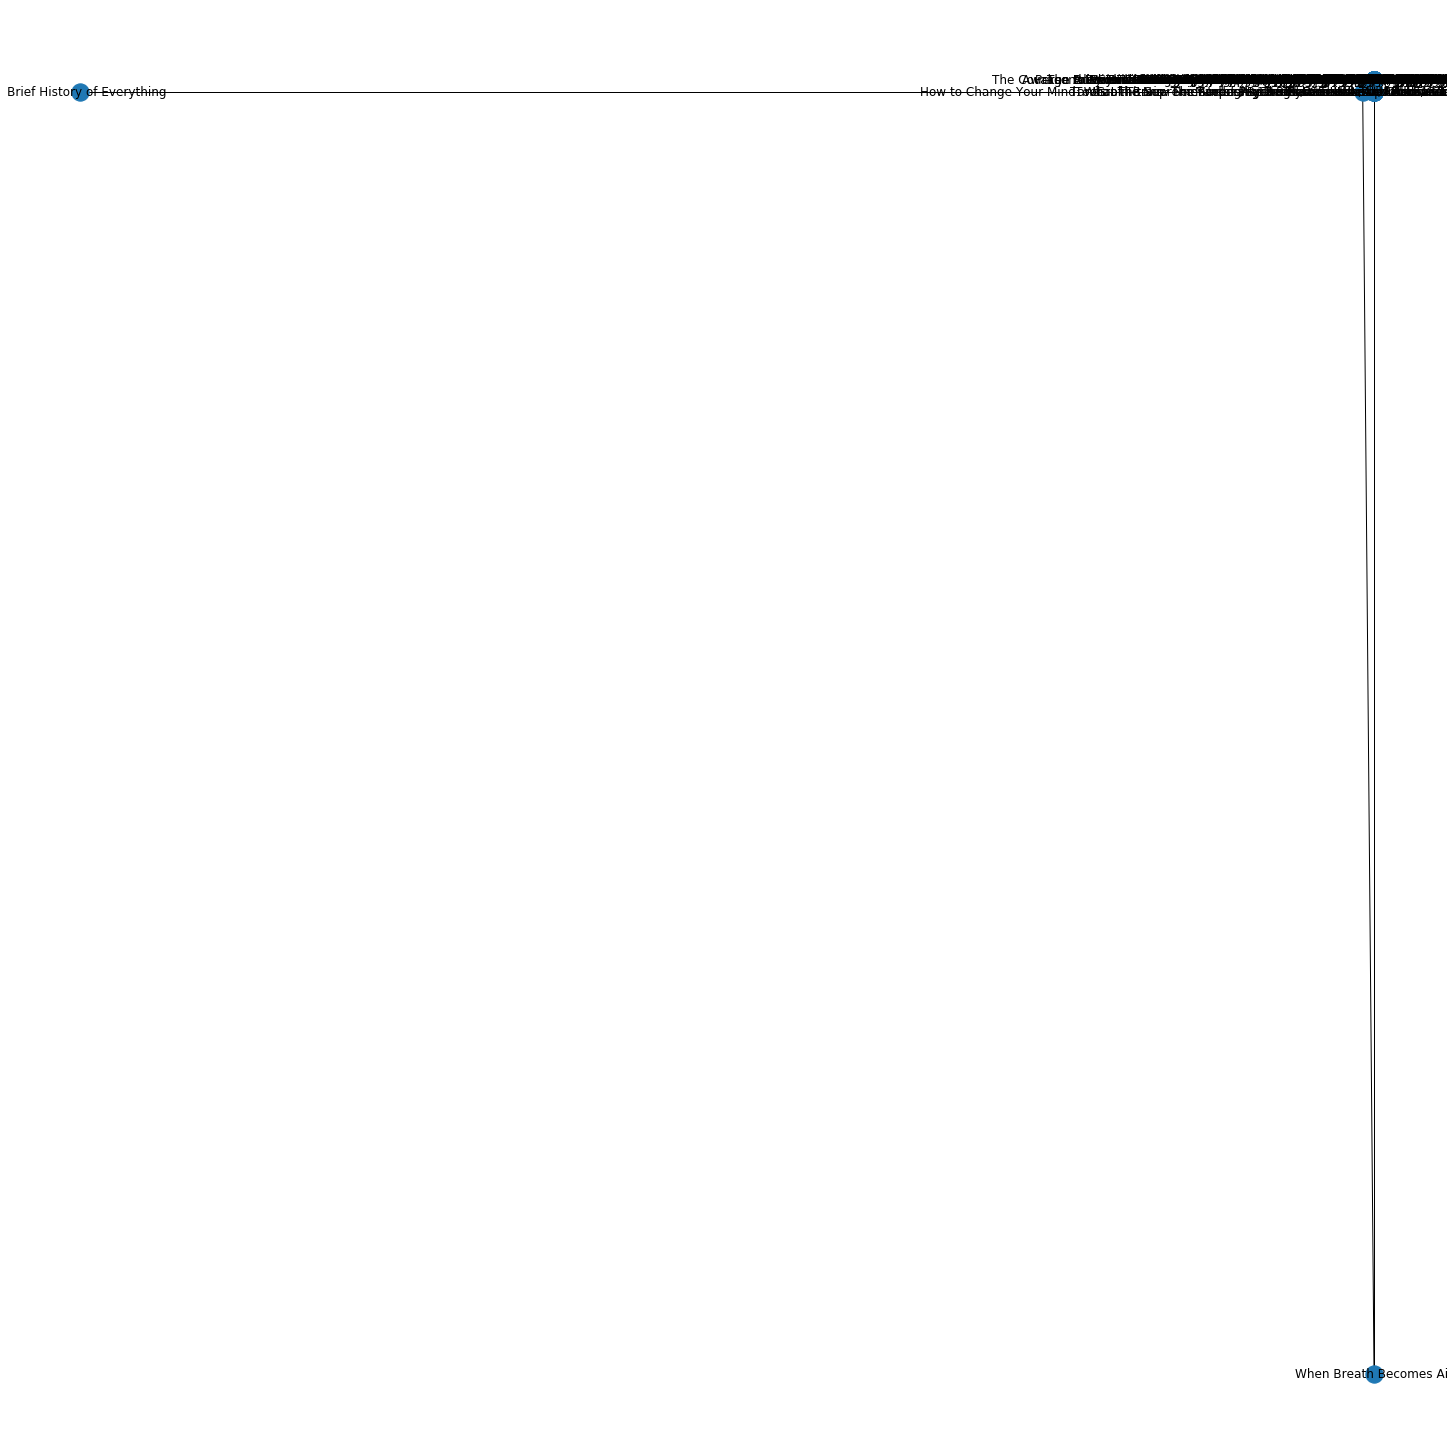

In [21]:
plt.figure(figsize=(20,20))

G=nx.Graph()
G.add_edges_from(my_book_edges)
nx.draw_spectral(G, with_labels=True)
plt.savefig("simple_path.png", dpi=1000) # save as png
plt.show() # display

In [20]:
# Test orientations 
# nx.draw_random(G)  
# nx.draw_circular(G)  
# nx.draw_spectral(G)  
# nx.draw_spring(G) 

In [ ]:
G = nx.balanced_tree(10,10)
